In [54]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import linear_model
import pickle
%matplotlib inline

In [55]:
# Load the hr data set
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [56]:
# Check the missing Values in the Dataset
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Data exploration and visualization


## Visualize the distribution of employees across different departments

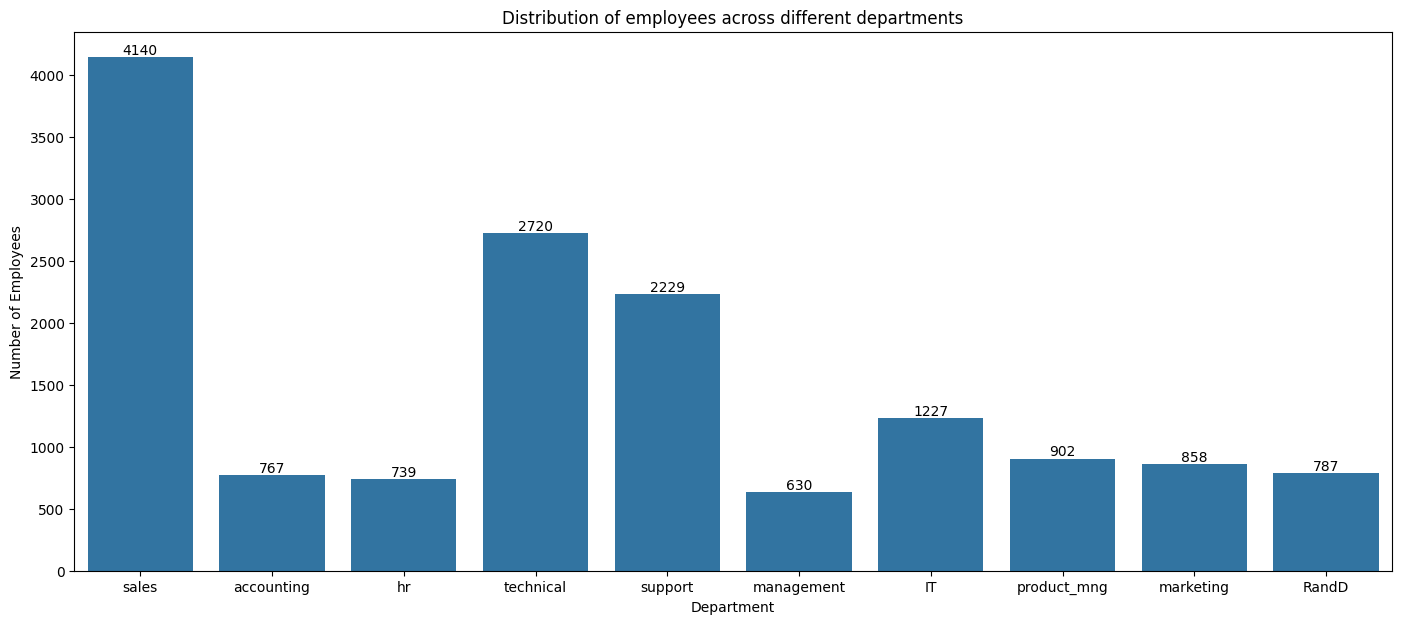

In [57]:
plt.figure(figsize=(17,7))
ax = sn.countplot(x = df['Department'], data = df)

# Add labels to the bars in the count plot
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Distribution of employees across different departments")
plt.ylabel('Number of Employees')
plt.show()

In [58]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

## Visualize the number of employees who left in each department

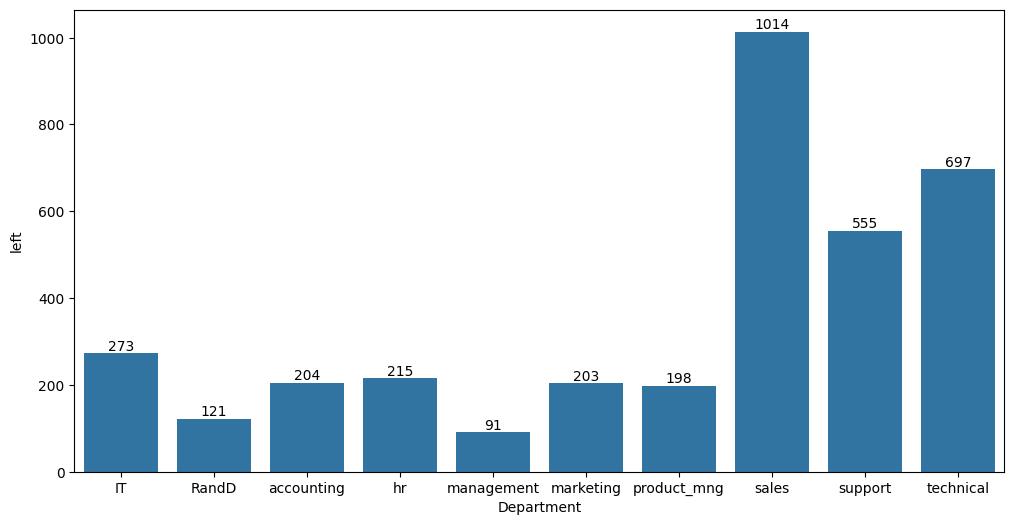

In [59]:
plt.figure(figsize=(12,6))
dept_left = df[df['left'] == 1].groupby('Department')['left'].sum()
ax = sn.barplot(x = 'Department' , y = 'left', data = pd.DataFrame(dept_left))

# Add labels to the bars in the bar plot
for bars in ax.containers:
    ax.bar_label(bars)

## Pie chart to show the distribution of employees who left and did not leave

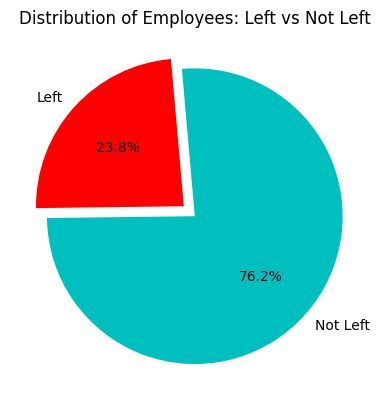

In [60]:
left_count = (df['left'] == 1).sum()
not_left_count = len(df) - left_count

plt.pie([left_count, not_left_count], labels=['Left', 'Not Left'], colors=['red', 'c'], explode=(0.1, 0), autopct="%1.1f%%", startangle=95, shadow=False )
plt.title('Distribution of Employees: Left vs Not Left')
plt.show()


## Visualize the distribution of salary levels among employees

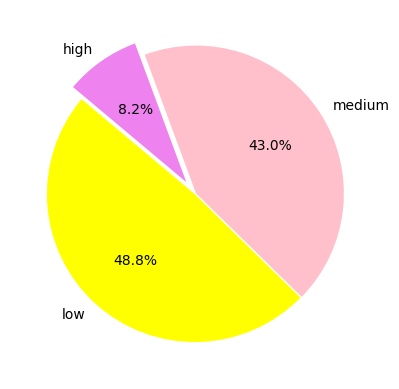

In [61]:
salary_counts = df['salary'].value_counts()
plt.pie(salary_counts, labels=salary_counts.index, colors=['yellow', 'pink', 'violet'], explode=(0, 0.01, 0.1), autopct='%1.1f%%', startangle=140)
plt.show()

In [62]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [63]:
## satisfaction lvl  >0.20 , > 0.40, > 0.50, <0.50

In [64]:
df.index

RangeIndex(start=0, stop=14999, step=1)

## Create satisfaction level categories and visualize their distribution

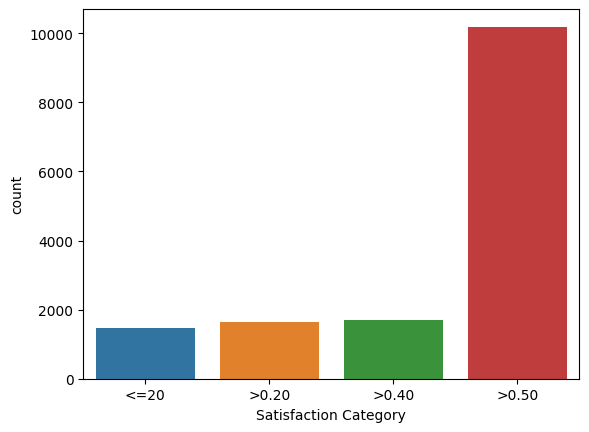

In [65]:
df['satisfaction_level']
bins = [-float('inf'), 0.20,0.40,0.50, float('inf')]
label = ['<=20', '>0.20' , '>0.40', '>0.50' ]

df['satisfaction_category'] = pd.cut(df['satisfaction_level'], bins = bins, labels=label)

# Plot satisfaction level categories
sn.countplot(x = 'satisfaction_category', hue='satisfaction_category', legend = False,data = df)
plt.xlabel('Satisfaction Category')
plt.show()

## Visualize the distribution of salary levels in each department

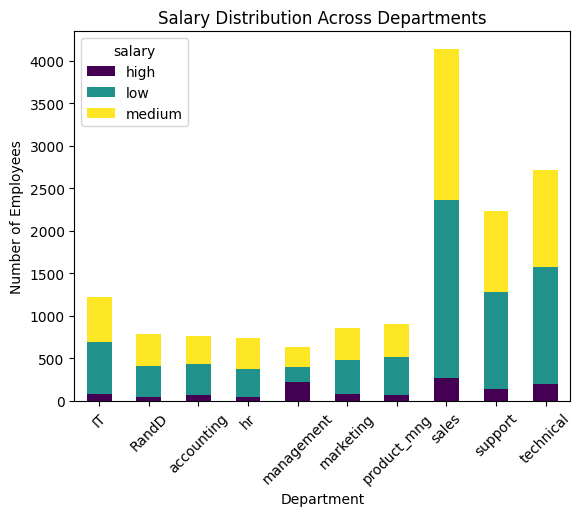

In [66]:

salary_distribution_df = df.groupby(['Department', 'salary']).size().unstack()
# Stacked bar plot for salary distribution in each department
ax = salary_distribution_df.plot(kind ='bar', stacked = True, colormap='viridis')
plt.xticks(rotation = 45)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Salary Distribution Across Departments')
plt.show()

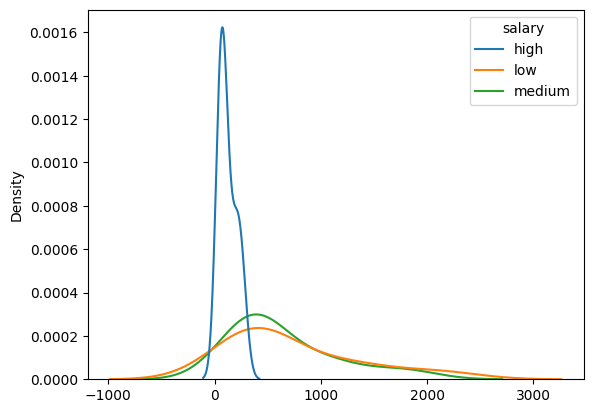

In [67]:
sn.kdeplot(data = salary_distribution_df) 
plt.show()

# Logistic Regression Model

In [68]:
# Create a subset of the DataFrame for logistic regression
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [69]:
# Create dummy variables for the 'salary' column
# Convert dummy variables to integers and drop the original 'salary' column
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary").astype(int)
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [70]:
df_with_dummies.drop('salary' , axis = 'columns', inplace = True)

In [71]:
# Split the data into training and testing sets
X = df_with_dummies
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.30)

In [72]:
# Train a logistic regression model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
# Make predictions on the test set
prediction = model.predict(X_test)

In [74]:
# Evaluate the model's accuracy on the test set
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.7776190476190477


In [75]:
with open('logistic_model', 'wb') as f:
    pickle.dump(model, f)

In [76]:
salary_dummies.astype(int)

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0
